In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
import os
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [10]:
raspberry = "pi1"
path = "dataset/raspberry/"+raspberry
files = []
for file in os.listdir(path):
    if(".csv" in file):
        files.append(file)

In [2]:
raspberry = "ARpi1"
path = "dataset/results/"+raspberry
files = ["2019-05-13 00-00-01 scd30.csv","2019-05-28 01-00-01 scd30.csv","2019-06-13 01-00-02 scd30.csv",
          "2019-05-20 00-00-01 scd30.csv","2019-06-10 01-00-02 scd30.csv","2019-05-29 01-00-02 scd30.csv"]

In [5]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d %H-%M-%S')
data = []
data5 = []
data10 = []
data15 = []
data20 = []
data25 = []
data30 = []
data100 = []
data200 = []
data300 = []
data500 = []
data1000 = []
for file in files:
    print(file)
    data.append(pd.read_csv(path+"/"+file, parse_dates=['Time'], index_col='Time',date_parser=dateparse))
nbData = len(data)

for i in range(0,nbData):
    idx = pd.date_range(start=data[i].index[0],end=data[i].index[-1],freq="S")
    data[i] = data[i].reindex(idx, fill_value=np.nan)
    data[i] = data[i].interpolate()
    #data[i] = data[i][data[i]["#CO2"]<=7000]["#CO2"]
    data5.append(data[i].resample("5S").mean())
    #data10.append(data[i].resample("10S").mean())
    #data15.append(data[i].resample("15S").mean())
    #data20.append(data[i].resample("20S").mean())
    #data25.append(data[i].resample("25S").mean())
    #data30.append(data[i].resample("30S").mean())
    #data100.append(data[i].resample("100S").mean())
    #data200.append(data[i].resample("200S").mean())
    #data300.append(data[i].resample("300S").mean())
    #data500.append(data[i].resample("500S").mean())
    #data1000.append(data[i].resample("1000S").mean())

2019-05-13 00-00-01 scd30.csv
2019-05-28 01-00-01 scd30.csv
2019-06-13 01-00-02 scd30.csv
2019-05-20 00-00-01 scd30.csv
2019-06-10 01-00-02 scd30.csv
2019-05-29 01-00-02 scd30.csv


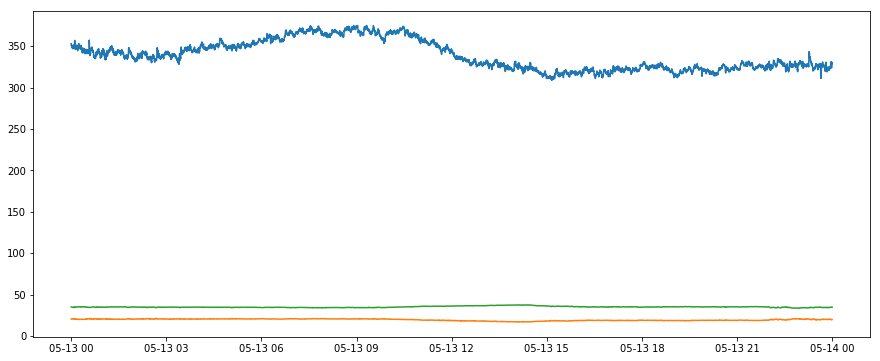

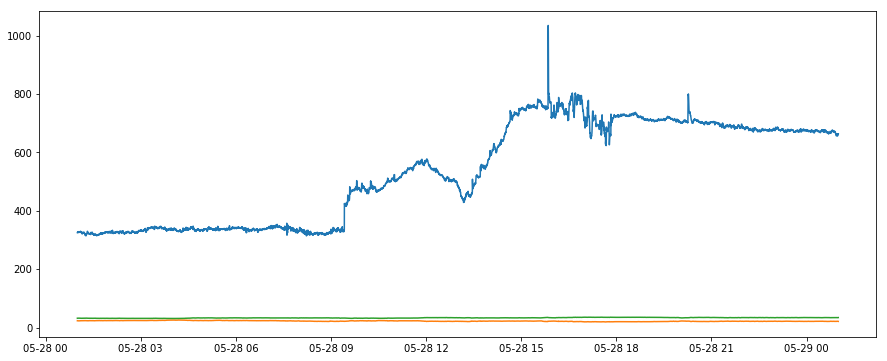

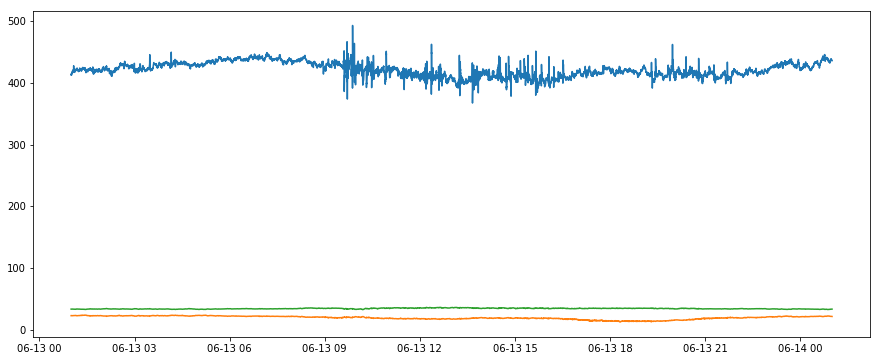

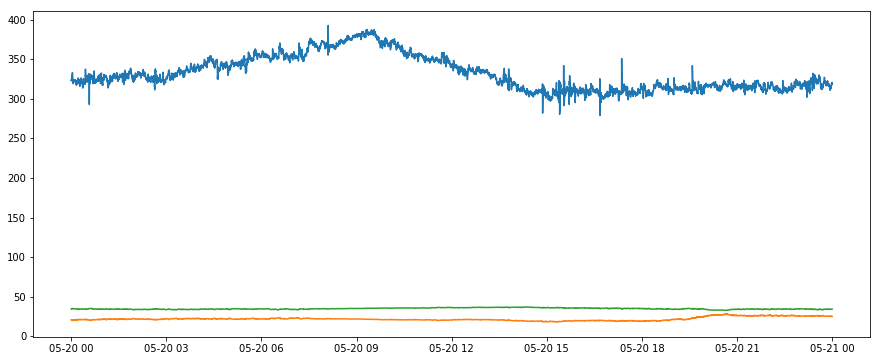

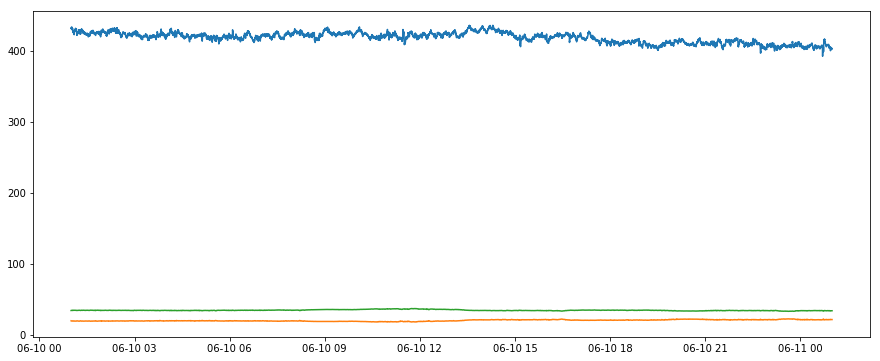

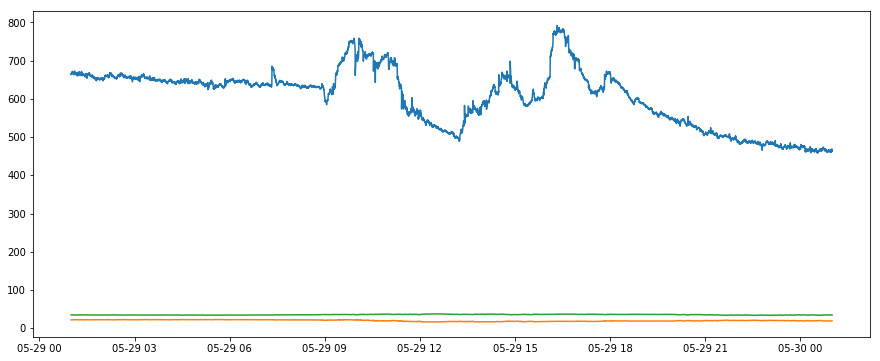

In [9]:
for i in range(0,len(data)):
    plt.figure()
    plt.plot(data5[i])
    #plt.figure()
    #plt.plot(data10[i])
    #plt.figure()
    #plt.plot(data15[i])
    #plt.figure()
    #plt.plot(data20[i])
    #plt.figure()
    #plt.plot(data25[i])
    #plt.figure()
    #plt.plot(data30[i])
    #plt.figure()
    #plt.plot(data100[i])
    #plt.figure()
    #plt.plot(data200[i])
    #plt.figure()
    #plt.plot(data300[i])
    #plt.figure()
    #plt.plot(data500[i])
    #plt.figure()
    #plt.plot(data1000[i])

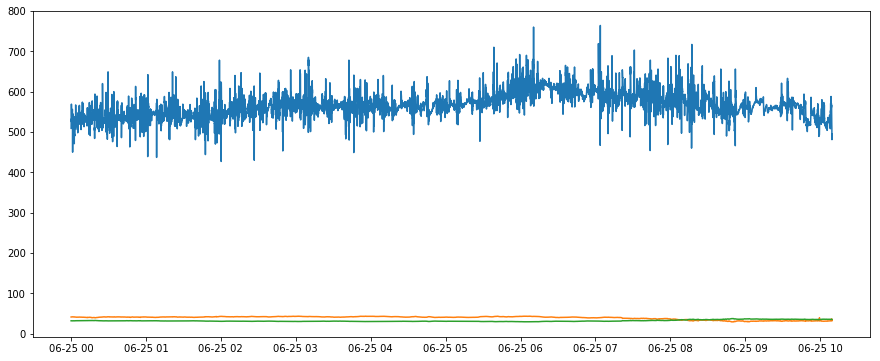

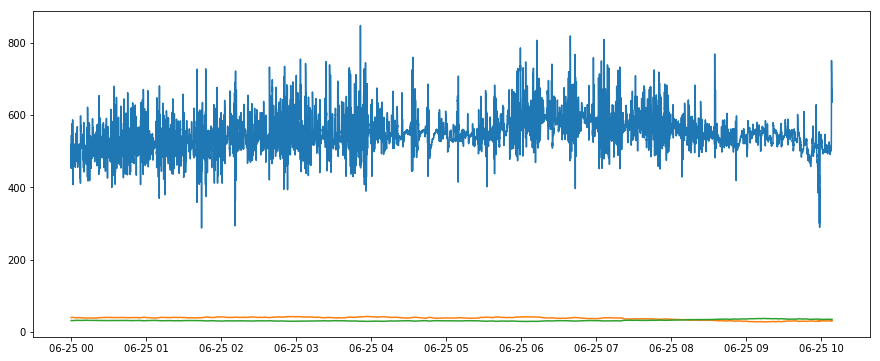

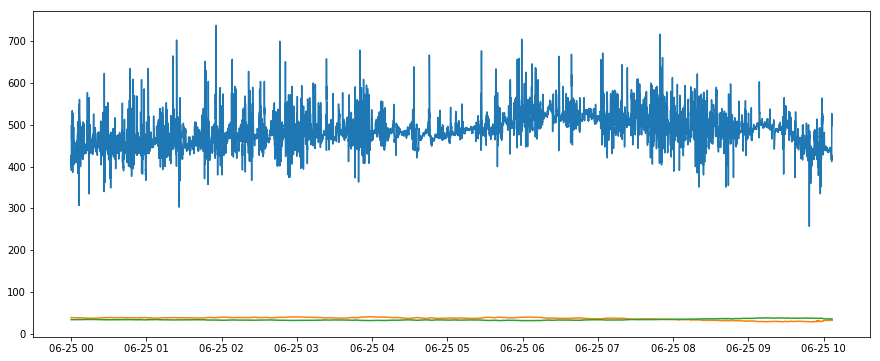

In [61]:
i = 0
for d in data:
    plt.figure()
    plt.plot(d)
    plt.savefig("graphs/"+raspberry+"-"+str(i))
    i+=1

In [56]:
testData = data[2]
testData = testData.resample("5S").mean()
len(testData)

17281